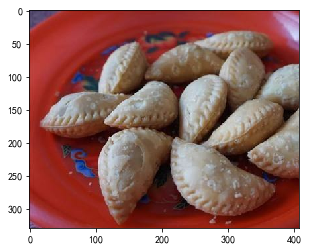

show decode_jpeg
Digital type:  <dtype: 'float32'>


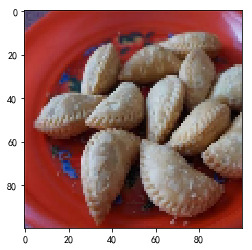

show resize_images


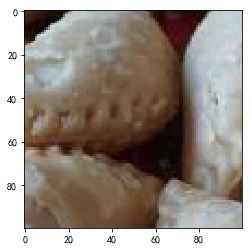

show image.resize_image_with_crop_or_pad(img_data, 100, 100)


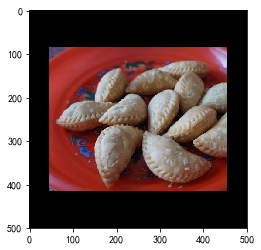

show resize_image_with_crop_or_pad(img_data, 500, 500)


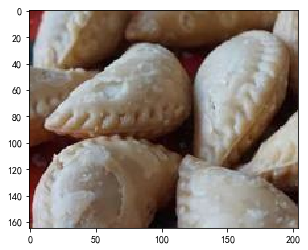

show central_crop(img_data, 0.5)


In [6]:
# 处理单个图片的resize_image_with_crop_or_pad，不带保存功能
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

image_raw_data = tf.gfile.FastGFile('.//img_4082.jpg','rb').read()

with tf.Session() as sess:
     img_data = tf.image.decode_jpeg(image_raw_data)
     plt.imshow(img_data.eval())
     plt.show()
     print("show decode_jpeg")

     resized = tf.image.resize_images(img_data, [100, 100], method=0)
     # TensorFlow的函数处理图片后存储的数据是float32格式的，需要转换成uint8才能正确打印图片。
     print("Digital type: ", resized.dtype)
     resized = np.asarray(resized.eval(), dtype='uint8')
     # tf.image.convert_image_dtype(rgb_image, tf.float32)
     plt.imshow(resized)
     plt.show()
     print("show resize_images")   

     croped = tf.image.resize_image_with_crop_or_pad(img_data, 100, 100)
     padded = tf.image.resize_image_with_crop_or_pad(img_data, 500, 500)
     plt.imshow(croped.eval())
     plt.show()
     print("show image.resize_image_with_crop_or_pad(img_data, 100, 100)")
     plt.imshow(padded.eval())
     plt.show()
     print("show resize_image_with_crop_or_pad(img_data, 500, 500)")   

     central_cropped = tf.image.central_crop(img_data, 0.5)
     plt.imshow(central_cropped.eval())
     plt.show()
     print("show central_crop(img_data, 0.5)")    

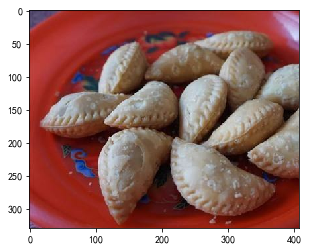

show decode_jpeg


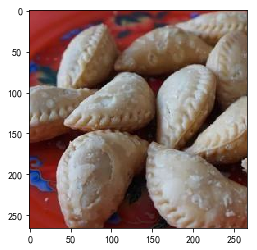

In [12]:
# 处理单个图片的resize_image_with_crop_or_pad，带保存功能
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from tensorflow.io.gfile import GFile

givenDir = 'train'

savedDir = 'saved'
if not os.path.exists(savedDir):
   os.makedirs(savedDir) 

testPicPath = './/img_4082.jpg'
image_raw_data = tf.gfile.FastGFile(testPicPath, 'rb').read()

with tf.Session() as sess:
     img_data = tf.image.decode_jpeg(image_raw_data)
     plt.imshow(img_data.eval())
     plt.show()
     print("show decode_jpeg")

     croped = tf.image.resize_image_with_crop_or_pad(img_data, 266, 266)
     plt.imshow(croped.eval())
     plt.show()
     
     encode_data=tf.image.encode_jpeg(croped)
     with GFile('.//test_img_4082.jpg', 'wb') as file:
        file.write(encode_data.eval())
     
     

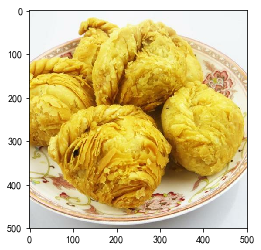

show decode_jpeg


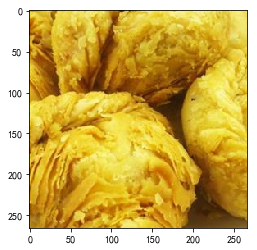

./train/imgaug_img_4066.jpg


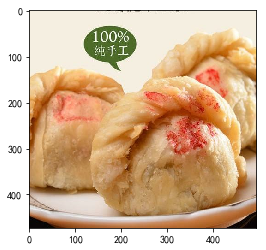

show decode_jpeg


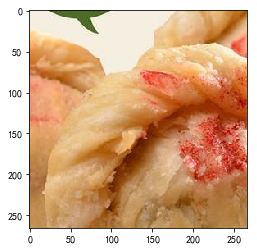

./train/imgaug_img_4067.jpg


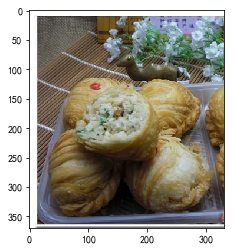

show decode_jpeg


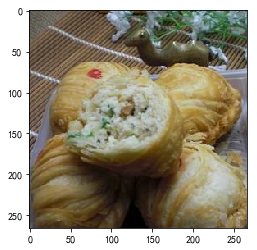

./train/imgaug_img_4079.jpg


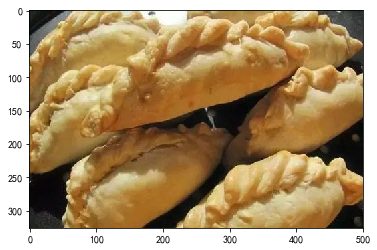

show decode_jpeg


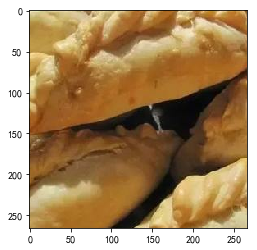

./train/imgaug_img_4071.jpg


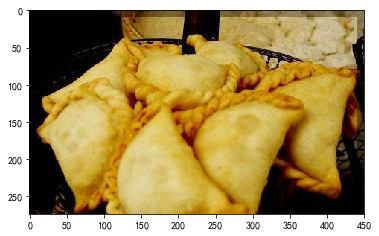

show decode_jpeg


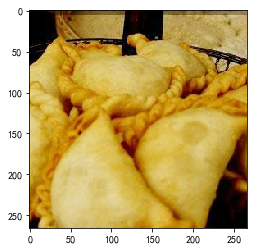

./train/imgaug_img_4072.jpg


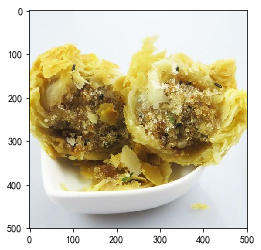

show decode_jpeg


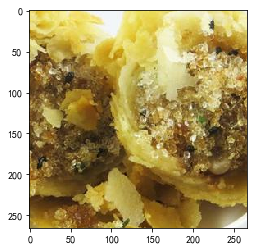

./train/imgaug_img_4065.jpg


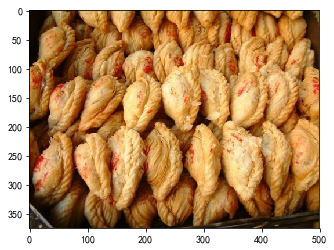

show decode_jpeg


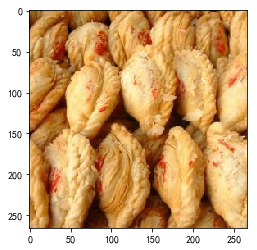

./train/imgaug_img_4080.jpg


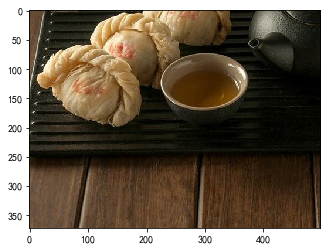

show decode_jpeg


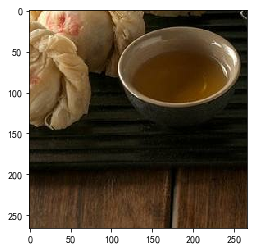

./train/imgaug_img_4064.jpg


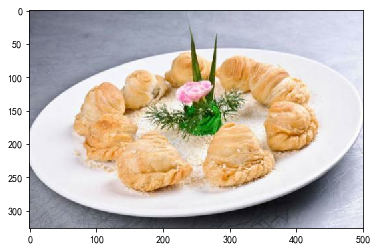

show decode_jpeg


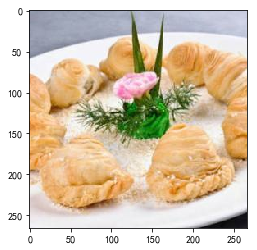

./train/imgaug_img_4069.jpg


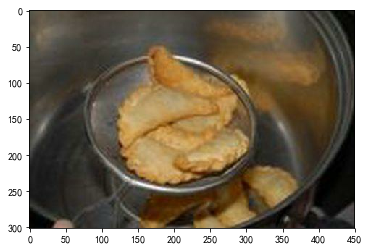

show decode_jpeg


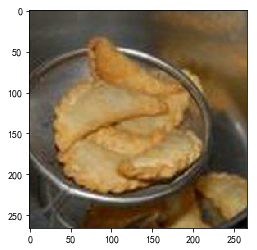

./train/imgaug_img_4077.jpg


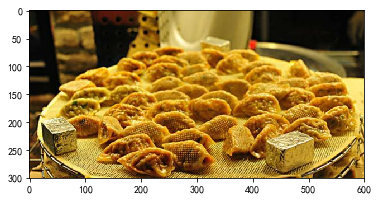

show decode_jpeg


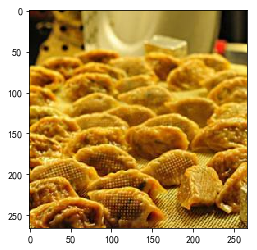

./train/imgaug_img_4073.jpg


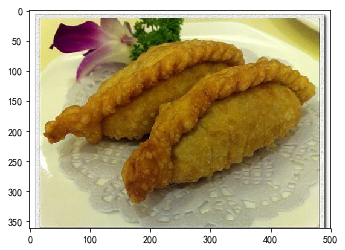

show decode_jpeg


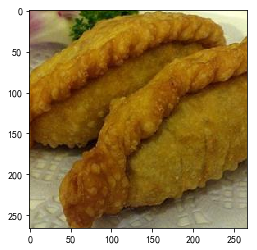

./train/imgaug_img_4086.jpg


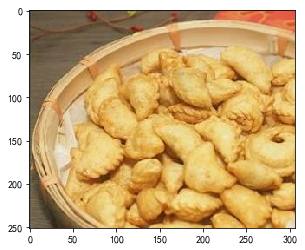

show decode_jpeg


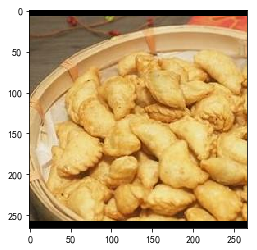

./train/imgaug_img_4085.jpg


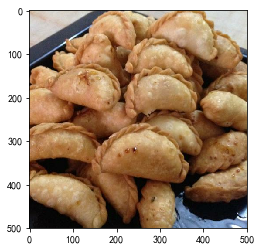

show decode_jpeg


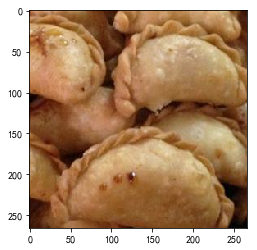

./train/imgaug_img_4076.jpg


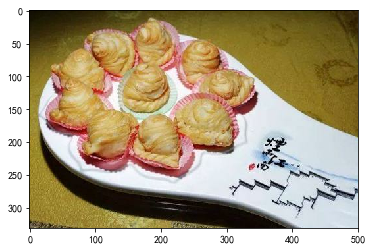

show decode_jpeg


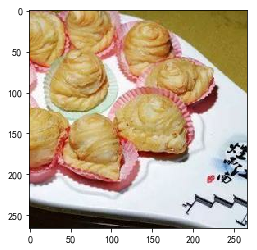

./train/imgaug_img_4068.jpg


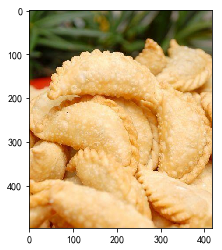

show decode_jpeg


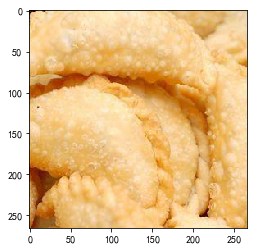

./train/imgaug_img_4083.jpg


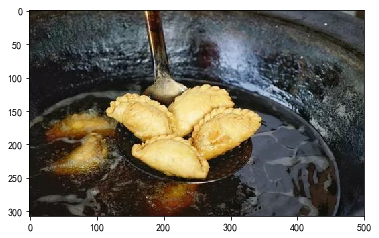

show decode_jpeg


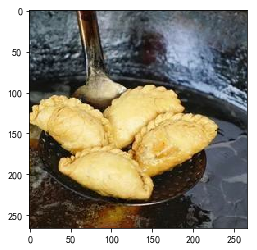

./train/imgaug_img_4081.jpg


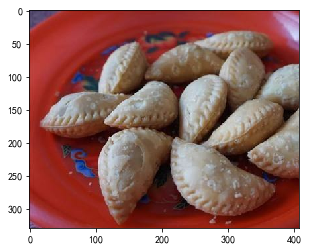

show decode_jpeg


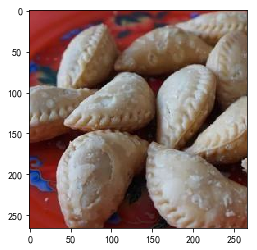

./train/imgaug_img_4082.jpg


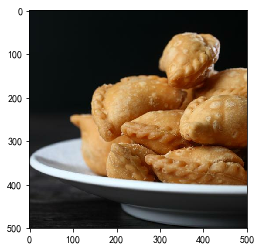

show decode_jpeg


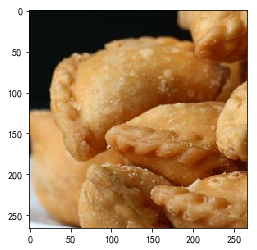

./train/imgaug_img_4078.jpg
./train/1
./train/0


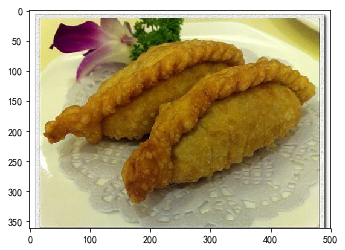

show decode_jpeg


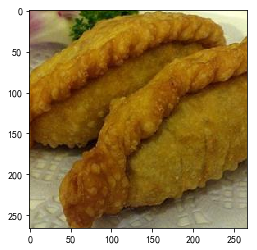

./train/1/imgaug_img_4086.jpg


In [27]:
# 处理文件夹内所有图片的resize_image_with_crop_or_pad，并保存在同一个文件夹下
import os

def get_filePath_fileName_fileExt(fileUrl):
    """
    获取文件路径， 文件名， 后缀名
    :param fileUrl:
    :return:
    """
    filepath, tmpfilename = os.path.split(fileUrl)
    shotname, extension = os.path.splitext(tmpfilename)
    # print(filepath)
    # print(shotname)
    # print(tmpfilename)
    # print(extension)
    return filepath, shotname, extension

# 修改文件名
def changeFileName(filepath, shotname, extension, suffix):
    return filepath+'/'+suffix+shotname+extension

    
def processFile(testPicPath, savedDFile):
    
    image_raw_data = tf.gfile.FastGFile(testPicPath, 'rb').read()

    with tf.Session() as sess:
         img_data = tf.image.decode_jpeg(image_raw_data)
         plt.imshow(img_data.eval())
         plt.show()
         print("show decode_jpeg")

         croped = tf.image.resize_image_with_crop_or_pad(img_data, 266, 266)
         plt.imshow(croped.eval())
         plt.show()

         encode_data=tf.image.encode_jpeg(croped)
         with GFile(savedDFile, 'wb') as file:
            file.write(encode_data.eval())

# 遍历文件夹
def walkFile(file):
    for root, dirs, files in os.walk(file):

        # root 表示当前正在访问的文件夹路径
        # dirs 表示该文件夹下的子目录名list
        # files 表示该文件夹下的文件list

        # 遍历文件
        for f in files:
            if not "ipynb_checkpoints" in os.path.join(root, f):
              filepath, shotname, extension =get_filePath_fileName_fileExt(os.path.join(root, f))
              finalName = changeFileName(filepath, shotname, extension, "imgaug_")
              processFile(os.path.join(root, f),finalName)
              print(finalName)

        # 遍历所有的文件夹
        for d in dirs:
            if not "ipynb_checkpoints" in os.path.join(root, d):
              print(os.path.join(root, d))



walkFile("./train")


In [ ]:

# 处理文件夹内所有图片的resize_image_with_crop_or_pad，并保存在指定文件夹下
import os

def get_filePath_fileName_fileExt(fileUrl):
    """
    获取文件路径， 文件名， 后缀名
    :param fileUrl:
    :return:
    """
    filepath, tmpfilename = os.path.split(fileUrl)
    shotname, extension = os.path.splitext(tmpfilename)
    # print(filepath)
    # print(shotname)
    # print(tmpfilename)
    # print(extension)
    return filepath, shotname, extension

# 修改文件名
def changeFileName(filepath, shotname, extension, suffix):
    return filepath+'/'+suffix+shotname+extension

    
def processFile(testPicPath, savedDFile):
    
    image_raw_data = tf.gfile.FastGFile(testPicPath, 'rb').read()

    with tf.Session() as sess:
         img_data = tf.image.decode_jpeg(image_raw_data)
         plt.imshow(img_data.eval())
         plt.show()
         print("show decode_jpeg")

         croped = tf.image.resize_image_with_crop_or_pad(img_data, 266, 266)
         plt.imshow(croped.eval())
         plt.show()

         encode_data=tf.image.encode_jpeg(croped)
         with GFile(savedDFile, 'wb') as file:
            file.write(encode_data.eval())

# 遍历文件夹
def walkFile(savedDir,file):
    if not os.path.exists(savedDir):
       os.makedirs(savedDir) 
    for root, dirs, files in os.walk(file):

        # root 表示当前正在访问的文件夹路径
        # dirs 表示该文件夹下的子目录名list
        # files 表示该文件夹下的文件list

        # 遍历文件
        for f in files:
            if not "ipynb_checkpoints" in os.path.join(root, f):
              filepath, shotname, extension =get_filePath_fileName_fileExt(os.path.join(root, f))
              finalName = changeFileName(savedDir, shotname, extension, "imgaug_")
              processFile(os.path.join(root, f),finalName)
              print(finalName)

        # 遍历所有的文件夹
        for d in dirs:
            if not "ipynb_checkpoints" in os.path.join(root, d):
              print(os.path.join(root, d))


walkFile("savedDir","./train")

     
     

In [10]:
import os

def makeExDir(old):
    os.makedirs(old+"_new")
    return old+"_new"



# 遍历文件夹
def walkFile(file):
    for root, dirs, files in os.walk(file):

        # root 表示当前正在访问的文件夹路径
        # dirs 表示该文件夹下的子目录名list
        # files 表示该文件夹下的文件list

        # 遍历文件
          # for f in files:
              # print(os.path.join(root, f))

        # 遍历所有的文件夹
        for d in dirs:
            if not "ipynb_checkpoints" in d:
                print(makeExDir(os.path.join(root, d)))
              # print(os.path.join(root, d))



walkFile("./train")



./train/1_new
./train/0_new


In [6]:
# 处理文件夹内所有图片的resize_image_with_crop_or_pad，并保存在指定文件夹下
import os
import tensorflow as tf
from tensorflow.io.gfile import GFile


def get_filePath_fileName_fileExt(fileUrl):
    """
    获取文件路径， 文件名， 后缀名
    :param fileUrl:
    :return:
    """
    filepath, tmpfilename = os.path.split(fileUrl)
    shotname, extension = os.path.splitext(tmpfilename)
    # print(filepath)
    # print(shotname)
    # print(tmpfilename)
    # print(extension)
    return filepath, shotname, extension

# 修改文件名
def changeFileName(filepath, shotname, extension, suffix):
    return filepath+'/'+suffix+shotname+extension

# 创建新的文件夹并返回这个文件夹的路径
def makeExDir(old):
    filepath, tmpfilename = os.path.split(old)
    newPath = './resized_data/' + tmpfilename
    if not os.path.exists(newPath):
     os.makedirs(newPath)
    return newPath

    
def processFile(testPicPath, savedDFile):
    
    image_raw_data = tf.gfile.FastGFile(testPicPath, 'rb').read()

    img_data = tf.image.decode_jpeg(image_raw_data)
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 266, 266)
    print("resize_image_with_crop_or_pad"+testPicPath)
    encode_data=tf.image.encode_jpeg(croped)
    with GFile(savedDFile, 'wb') as file:
        file.write(encode_data.eval())

# 遍历文件夹
def walkFile(file):
    for root, dirs, files in os.walk(file):
        # root 表示当前正在访问的文件夹路径
        # dirs 表示该文件夹下的子目录名list
        # files 表示该文件夹下的文件list

        # 遍历文件
        for f in files:
            if not "ipynb_checkpoints" in os.path.join(root, f):
              filepath, shotname, extension =get_filePath_fileName_fileExt(os.path.join(root, f))
              finalName = changeFileName(makeExDir(filepath), shotname, extension, "imgaug_")
              processFile(os.path.join(root, f),finalName)
              print(finalName)

        # 遍历所有的文件夹
        for d in dirs:
            if not "ipynb_checkpoints" in os.path.join(root, d):
              print(os.path.join(root, d))

In [7]:
with tf.Session() as sess:
    walkFile("./obs_management_with_sdk/train3")

     
     

./obs_management_with_sdk/train3/4
./obs_management_with_sdk/train3/1
./obs_management_with_sdk/train3/5
./obs_management_with_sdk/train3/0
./obs_management_with_sdk/train3/9
./obs_management_with_sdk/train3/6
./obs_management_with_sdk/train3/7
./obs_management_with_sdk/train3/2
./obs_management_with_sdk/train3/3
./obs_management_with_sdk/train3/8
resize_image_with_crop_or_pad./obs_management_with_sdk/train3/4/img_234.jpg
./resized_data/4/imgaug_img_234.jpg
resize_image_with_crop_or_pad./obs_management_with_sdk/train3/4/img_272.jpg
./resized_data/4/imgaug_img_272.jpg
resize_image_with_crop_or_pad./obs_management_with_sdk/train3/4/img_250.jpg
./resized_data/4/imgaug_img_250.jpg
resize_image_with_crop_or_pad./obs_management_with_sdk/train3/4/img_247.jpg
./resized_data/4/imgaug_img_247.jpg
resize_image_with_crop_or_pad./obs_management_with_sdk/train3/4/img_255.jpg
./resized_data/4/imgaug_img_255.jpg
resize_image_with_crop_or_pad./obs_management_with_sdk/train3/4/img_269.jpg
./resized_data

KeyboardInterrupt: 

In [3]:
import os
filepath, tmpfilename = os.path.split('./obs_management_with_sdk/train2')
print(tmpfilename)

train2


In [ ]:
walkFile("./obs_management_with_sdk/train3")